In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Load the CSV file
data = pd.read_csv('quantization_results.csv')
baseline_data = pd.read_csv('baseline.csv')

# Separate data by tile size
wls = data['Word Length'].unique()

baseline_bleu = baseline_data['BLEU Score'][0]



In [3]:
baseline_bleu

41.337328250540224

/var/folders/6l/tkj8jq4d2c1fvr2j6g1kj0n40000gn/T/ipykernel_8525/3232630027.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', len(wls))


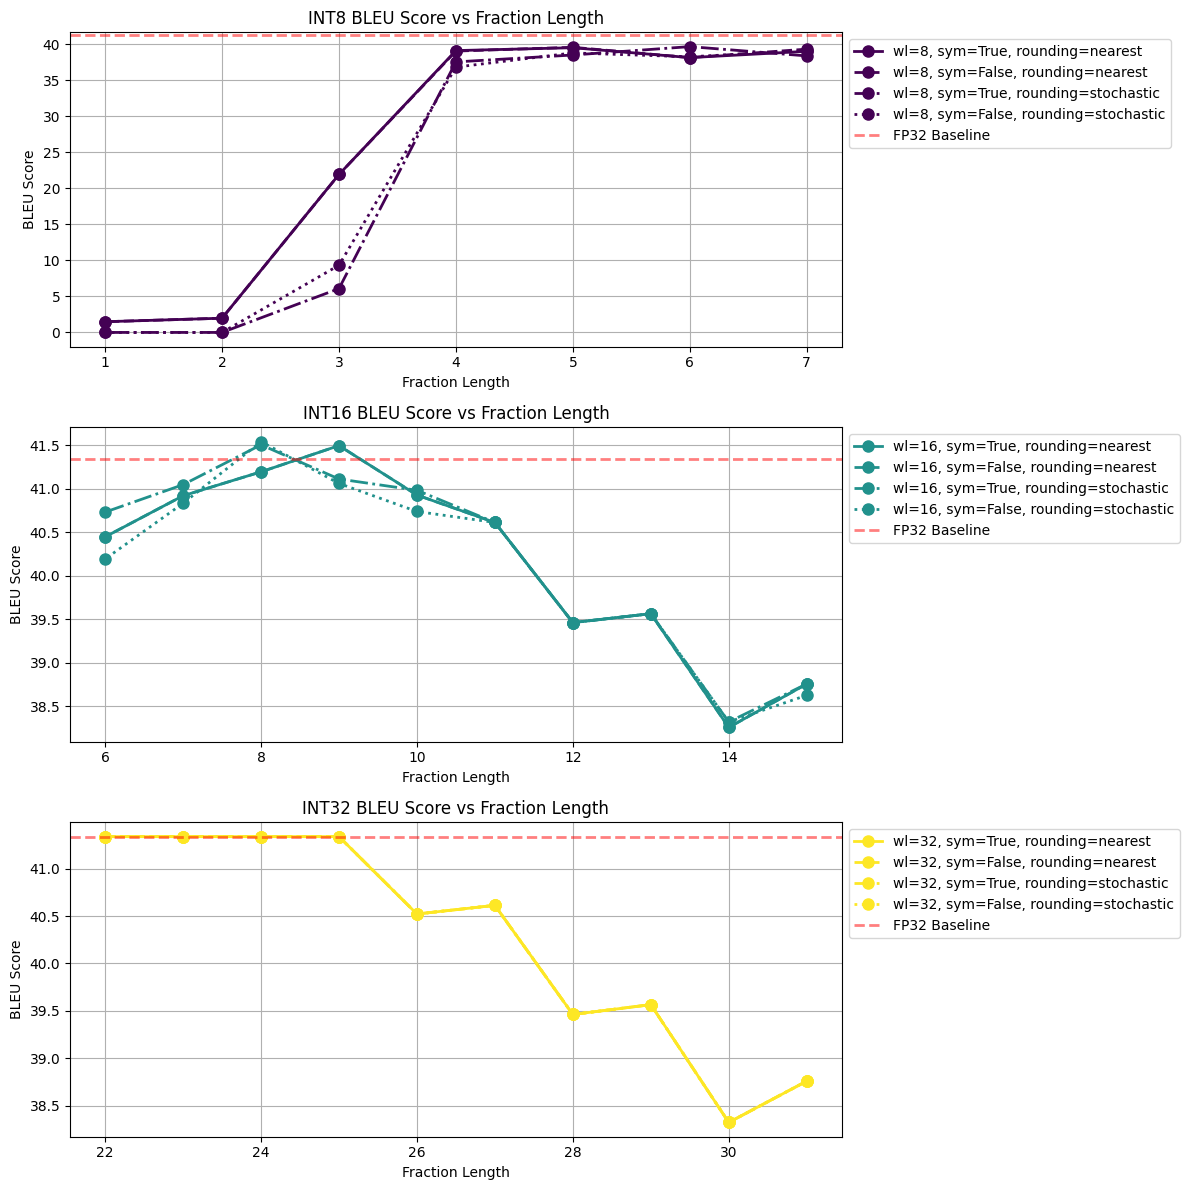

In [4]:
# Set up the plots
plt.figure(figsize=(12, 12))

# Generate a colormap with Viridis
viridis = cm.get_cmap('viridis', len(wls))

# Define line styles for different combinations
line_styles = ['-', '--', '-.', ':']

# Plot BLEU Score against MSE for INT8
plt.subplot(3, 1, 1)
index = 0  # To iterate through line styles
wl = 8
data_wl = data[(data['Word Length'] == wl)]
for rounding_mode in ['nearest', 'stochastic']:
    for sym in [True, False]:
        # Select the line style based on the index
        line_style = line_styles[index % len(line_styles)]
        plt.plot(
            data_wl[(data_wl['Symmetric'] == sym) & (data_wl['Round Mode'] == rounding_mode)]['Fraction Length'],
            data_wl[(data_wl['Symmetric'] == sym) & (data_wl['Round Mode'] == rounding_mode)]['BLEU Score'],
            marker='o',
            linestyle=line_style,
            linewidth=2,
            markersize=8,
            label=f'wl={wl}, sym={sym}, rounding={rounding_mode}',
            color=viridis(0 / len(wls))  # Assign the same color using the colormap
        )
        index += 1  # Update index for line style

plt.xlabel('Fraction Length')
plt.axhline(baseline_bleu, color='red', linestyle='--', linewidth=2, alpha=0.5, label='FP32 Baseline')
plt.ylabel('BLEU Score')
plt.title('INT8 BLEU Score vs Fraction Length')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside

# Plot BLEU Score against MSE for INT16
plt.subplot(3, 1, 2)
index = 0  # To iterate through line styles
wl = 16
data_wl = data[(data['Word Length'] == wl)]
for rounding_mode in ['nearest', 'stochastic']:
    for sym in [True, False]:
        # Select the line style based on the index
        line_style = line_styles[index % len(line_styles)]
        plt.plot(
            data_wl[(data_wl['Symmetric'] == sym) & (data_wl['Round Mode'] == rounding_mode)]['Fraction Length'],
            data_wl[(data_wl['Symmetric'] == sym) & (data_wl['Round Mode'] == rounding_mode)]['BLEU Score'],
            marker='o',
            linestyle=line_style,
            linewidth=2,
            markersize=8,
            label=f'wl={wl}, sym={sym}, rounding={rounding_mode}',
            color=viridis(1 / len(wls))  # Assign the same color using the colormap
        )
        index += 1  # Update index for line style

plt.xlabel('Fraction Length')
plt.axhline(baseline_bleu, color='red', linestyle='--', linewidth=2, alpha=0.5, label='FP32 Baseline')
plt.ylabel('BLEU Score')
plt.title('INT16 BLEU Score vs Fraction Length')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside

# Plot BLEU Score against MSE for INT32
plt.subplot(3, 1, 3)
index = 0  # To iterate through line styles
wl = 32
data_wl = data[(data['Word Length'] == wl)]
for rounding_mode in ['nearest', 'stochastic']:
    for sym in [True, False]:
        # Select the line style based on the index
        line_style = line_styles[index % len(line_styles)]
        plt.plot(
            data_wl[(data_wl['Symmetric'] == sym) & (data_wl['Round Mode'] == rounding_mode)]['Fraction Length'],
            data_wl[(data_wl['Symmetric'] == sym) & (data_wl['Round Mode'] == rounding_mode)]['BLEU Score'],
            marker='o',
            linestyle=line_style,
            linewidth=2,
            markersize=8,
            label=f'wl={wl}, sym={sym}, rounding={rounding_mode}',
            color=viridis(2 / len(wls))  # Assign the same color using the colormap
        )
        index += 1  # Update index for line style

plt.xlabel('Fraction Length')
plt.axhline(baseline_bleu, color='red', linestyle='--', linewidth=2, alpha=0.5, label='FP32 Baseline')
plt.ylabel('BLEU Score')
plt.title('INT32 BLEU Score vs Fraction Length')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside

plt.tight_layout()
plt.show()


/var/folders/6l/tkj8jq4d2c1fvr2j6g1kj0n40000gn/T/ipykernel_8525/147052627.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', len(wls))


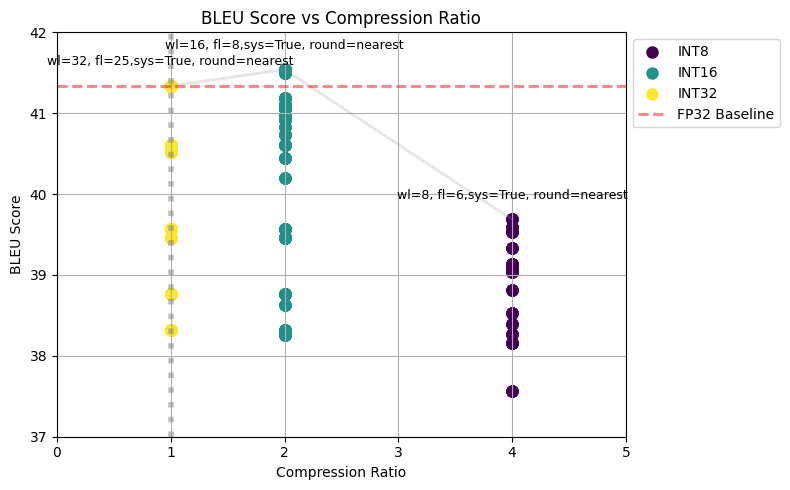

In [5]:
# Set up the plots
plt.figure(figsize=(8, 5))

# Generate a colormap with Viridis
viridis = cm.get_cmap('viridis', len(wls))

# To keep track of which labels have been added to the legend
labels_added = set()

highest_points = []
annotated = False  # Track if the annotation has been added

for i, wl in enumerate(wls):
    data_wl = data[(data['Word Length'] == wl)]
    for rounding_mode in ['nearest', 'stochastic']:
        for sym in [True, False]:
            # Define the label for the current word length
            label = f'INT{wl}'
            compression_ratio = 32 / data_wl['Word Length']

            # Find the maximum BLEU score point
            max_bleu_idx = data_wl['BLEU Score'].idxmax()
            max_bleu_compression = compression_ratio[max_bleu_idx]
            max_bleu_score = data_wl.loc[max_bleu_idx, 'BLEU Score']
            frac = data_wl.loc[max_bleu_idx, 'Fraction Length']
            highest_points.append((max_bleu_compression, max_bleu_score))
            
            # Annotate only once
            if not annotated:
                plt.annotate(f'wl={wl}, fl={frac},sys={sym}, round={rounding_mode}', 
                             (max_bleu_compression, max_bleu_score), 
                             textcoords="offset points", 
                             xytext=(0, 15), 
                             ha='center', 
                             fontsize=9, 
                             color='black')
                annotated = True  # Mark annotation as done
            
            # Only add the label if it hasn't been added before
            if label not in labels_added:
                plt.scatter(
                    compression_ratio,
                    data_wl['BLEU Score'],
                    marker='o',
                    s=64,  # Use 's' for markersize in scatter (squared size)
                    label=label,
                    color=viridis(i / len(wls))  # Assign the same color using the colormap
                )
                labels_added.add(label)  # Mark this label as added
            else:
                plt.scatter(
                    compression_ratio,
                    data_wl['BLEU Score'],
                    marker='o',
                    s=64,
                    color=viridis(i / len(wls))  # Same color, no label
                )
    annotated = False

# Sort the highest points by their compression ratio to draw a proper line
highest_points.sort(key=lambda x: x[0])

# Plot a line connecting the highest BLEU score points
plt.plot(
    [point[0] for point in highest_points],
    [point[1] for point in highest_points],
    linestyle='-', color='gray', linewidth=2, alpha=0.2
)

plt.xlabel('Compression Ratio')
plt.axhline(baseline_bleu, color='red', linestyle='--', linewidth=2, alpha=0.5, label='FP32 Baseline')
plt.axvline(1, color='gray', linestyle=':', linewidth=4, alpha=0.5)
plt.ylabel('BLEU Score')
plt.ylim([37, 42])
plt.xlim([0, 5])
plt.title('BLEU Score vs Compression Ratio')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside

plt.tight_layout()
plt.show()


/var/folders/6l/tkj8jq4d2c1fvr2j6g1kj0n40000gn/T/ipykernel_8525/197636612.py:19: FutureWarning: The provided callable <function mean at 0x10770d800> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_pivot = heatmap_data.pivot_table(values='BLEU Score', index='Y', columns='X', aggfunc=np.mean)
/var/folders/6l/tkj8jq4d2c1fvr2j6g1kj0n40000gn/T/ipykernel_8525/197636612.py:19: FutureWarning: The provided callable <function mean at 0x10770d800> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_pivot = heatmap_data.pivot_table(values='BLEU Score', index='Y', columns='X', aggfunc=np.mean)
/var/folders/6l/tkj8jq4d2c1fvr2j6g1kj0n40000gn/T/ipykernel_8525/197636612.py:19: FutureWarning: The provided callable <function mean at 0x1077

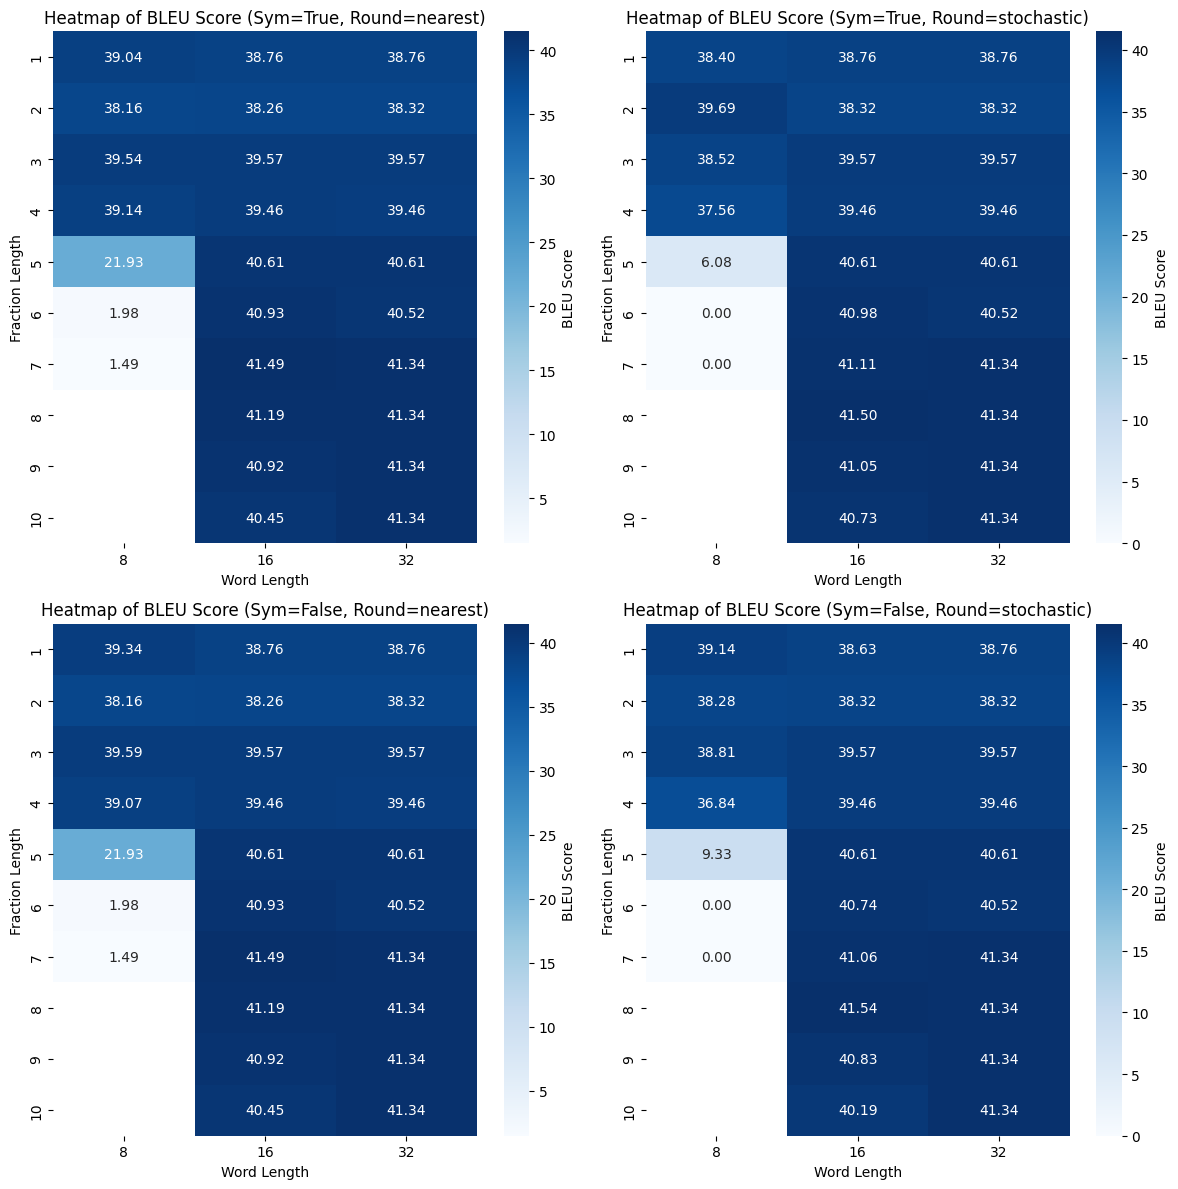

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.figure(figsize=(12, 12))

symmetric = [True, False]
round_modes = ['nearest', 'stochastic']

combinations = [(sym, mode) for sym in symmetric for mode in round_modes]

for i, (sym, mode) in enumerate(combinations, 1):
    plt.subplot(2, 2, i)
    # Prepare data for the heatmap
    heatmap_data = data[(data['Symmetric'] == sym) & (data['Round Mode'] == mode)].copy()
    heatmap_data['X'] = heatmap_data['Word Length']
    heatmap_data['Y'] = heatmap_data['Word Length'] - heatmap_data['Fraction Length']
    heatmap_pivot = heatmap_data.pivot_table(values='BLEU Score', index='Y', columns='X', aggfunc=np.mean)

    # Plot the heatmap with a blue colormap
    sns.heatmap(heatmap_pivot, cmap='Blues', annot=True, fmt=".2f", cbar_kws={'label': 'BLEU Score'})
    plt.xlabel('Word Length')
    plt.ylabel('Fraction Length')
    plt.title(f'BLEU Score (Sym={sym}, Round={mode})')

plt.tight_layout()
plt.show()
